<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/Pre_Porcesamiento_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRE-PROCESAMIENTO DE DATA (SEPARACIÓN DE TRAIN Y TEST):**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO


#####Importar librerias:

In [0]:
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

##### Permisos y cambio de directorio:

In [199]:
# Permisos
drive.mount('/gdrive')

# Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis

# Contenido del Directorio actual
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Tesis
'Exploración de los Datos'    Pre-Porcesamiento-Data   test_images/
 Leer-Csv-Prueba.ipynb        Prueba                   train.csv
'Leer CSV train.ipynb'        Prueba-v2-csv            train_images/
'Leer imágenes-Tesis.ipynb'   sample_submission.csv


##### Lectura del archivo csv train:

In [200]:
# Creación de la variable df_train
df_train = pd.read_csv('train.csv')

# Muesta los primeros registros de df_train
print(df_train.shape)
df_train.head()

(22184, 2)


,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


##### Creación de un nuevo df_train

In [201]:
#Antes de correr (ctrl+F8)
ruta = './train_images'
df_split = df_train["Image_Label"].str.split("_", n = 1, expand = True)
df_train['Ruta']= (ruta + '/' + df_split[0])
df_train['Image_Label']=df_split[1]
df_train.columns = ['Label','EncodedPixels','Ruta']
df_train.head()

,Label,EncodedPixels,Ruta
0,Fish,264918 937 266318 937 267718 937 269118 937 27...,./train_images/0011165.jpg
1,Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,./train_images/0011165.jpg
2,Gravel,NaN,./train_images/0011165.jpg
3,Sugar,NaN,./train_images/0011165.jpg
4,Fish,233813 878 235213 878 236613 878 238010 881 23...,./train_images/002be4f.jpg


##### División del set completo de datos df_train en train y test

In [202]:
train, test = train_test_split(df_train,random_state = 6)
print("El número de registros del set de datos es de ",df_train.shape[0]," registros.")
print("Al dividir df_train en train y test las dimensiones de estos son las siguientes:")
print("La cantidad de registros para train es de: ",train.shape[0])
print("La cantidad de registros para test es de: ",test.shape[0])

El número de registros del set de datos es de  22184  registros.
Al dividir df_train en train y test las dimensiones de estos son las siguientes:
La cantidad de registros para train es de:  16638
La cantidad de registros para test es de:  5546


##### Análisis de la distribución de labels dentro de los dos nuevos conjuntos creados (train,test)

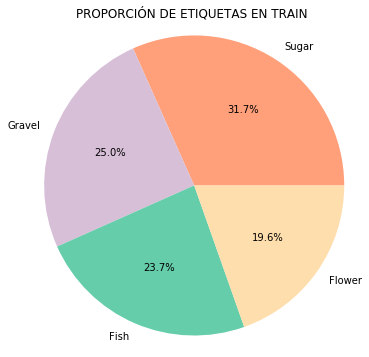

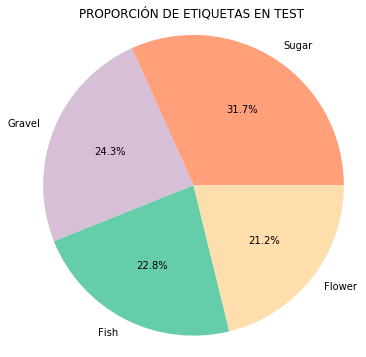

In [203]:
# Conteo por label contra la columna "EncodedPixels" para el set de datos en Train
fish = train[train['Label'] == 'Fish'].EncodedPixels.count()
flower = train[train['Label'] == 'Flower'].EncodedPixels.count()
gravel = train[train['Label'] == 'Gravel'].EncodedPixels.count()
sugar = train[train['Label'] == 'Sugar'].EncodedPixels.count()

labels = 'Sugar', 'Gravel', 'Fish', 'Flower'
sizes = [sugar, gravel, fish, flower]

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#FFA07A','#D8BFD8','#66CDAA','#FFDEAD']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
ax.axis('equal')
ax.set_title('PROPORCIÓN DE ETIQUETAS EN TRAIN')
plt.show()

# Conteo por label contra la columna "EncodedPixels" para el set de datos en Test
fish2 = test[test['Label'] == 'Fish'].EncodedPixels.count()
flower2 = test[test['Label'] == 'Flower'].EncodedPixels.count()
gravel2 = test[test['Label'] == 'Gravel'].EncodedPixels.count()
sugar2 = test[test['Label'] == 'Sugar'].EncodedPixels.count()

labels = 'Sugar', 'Gravel', 'Fish', 'Flower'
sizes = [sugar2, gravel2, fish2, flower2]

fig, ax2 = plt.subplots(figsize=(6, 6))
colores= ['#FFA07A','#D8BFD8','#66CDAA','#FFDEAD']
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
ax2.axis('equal')
ax2.set_title('PROPORCIÓN DE ETIQUETAS EN TEST')
plt.show()

##### Proporción de nulos para set de datos Train y Test

In [204]:
print("Cantidad de registros dentro de train: ",train.shape[0])
print("Registros validos en la columna EncodedPixels train: ",train.EncodedPixels.count())
print("Registros nulos en la columna EncodedPixels train: ",train.shape[0]-train.EncodedPixels.count())
print("")

Cantidad de registros dentro de train:  16638
Registros validos en la columna EncodedPixels train:  8902
Registros nulos en la columna EncodedPixels train:  7736



In [205]:
print("Cantidad de registros dentro de train: ",test.shape[0])
print("Registros validos en la columna EncodedPixels train: ",test.EncodedPixels.count())
print("Registros nulos en la columna EncodedPixels train: ",test.shape[0]-test.EncodedPixels.count())
print("")

Cantidad de registros dentro de train:  5546
Registros validos en la columna EncodedPixels train:  2934
Registros nulos en la columna EncodedPixels train:  2612



##### Llenado de nulos por '-1' para la columna "EncodedPixels

In [206]:
# Llenado de los datos nulos para set de datos Train
train = train.fillna('-1')
train.head()

,Label,EncodedPixels,Ruta
17989,Flower,7368 508 8768 508 10168 508 11568 508 12968 50...,./train_images/cff5747.jpg
19401,Flower,-1,./train_images/e03680b.jpg
16551,Sugar,2498243 498 2499643 498 2501043 498 2502443 49...,./train_images/bef3354.jpg
18299,Sugar,23126 577 24526 577 25926 577 27326 577 28726 ...,./train_images/d3998ec.jpg
9386,Gravel,-1,./train_images/6abd5e8.jpg


In [207]:
# Llenado de datos para set de datos Test
test = test.fillna('-1')
test.head()

,Label,EncodedPixels,Ruta
1223,Sugar,362926 3 364326 8 365726 6 365735 2 367126 6 3...,./train_images/0e47c4d.jpg
5540,Fish,17833 367 19233 367 20633 367 22033 367 23433 ...,./train_images/3fa4f8d.jpg
14828,Fish,-1,./train_images/a919025.jpg
16840,Fish,219802 325 221202 325 222602 325 224002 325 22...,./train_images/c2a3263.jpg
5590,Gravel,511 815 1911 815 3311 815 4700 892 6100 892 75...,./train_images/3ff99a9.jpg


##### Exportar a CSV set de datos

In [0]:
# Exporte de datos en csv para train

# Nombre del csv de salida de train 
output_name = "set_train.csv"

train.to_csv(output_name, sep=',', index=False, header=None)
!cp $output_name /Tesis

In [0]:
# Exporte de datos en csv para test

# Nombre del csv de salida de test
output_name = "set_test.csv"

test.to_csv(output_name, sep=',', index=False, header=None)
!cp $output_name /Tesis